In [125]:
#### Importing Libraries ####
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

dataset = pd.read_csv('appdata10.csv')

# Explore the dataset

In [126]:
dataset.head(10) # Viewing the Data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [127]:
dataset.describe() # Distribution of Numerical Variables

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
type(dataset["hour"][0])

str

In [129]:
dataset["hour"][0][0:3]

' 02'

In [130]:
# First set of Feature cleaning
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)   # Series.str.slice(start=None, stop=None, step=None) extract the first 2 char and convert to integer

In [131]:
### Plotting
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()# First set of Feature cleaning
#dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


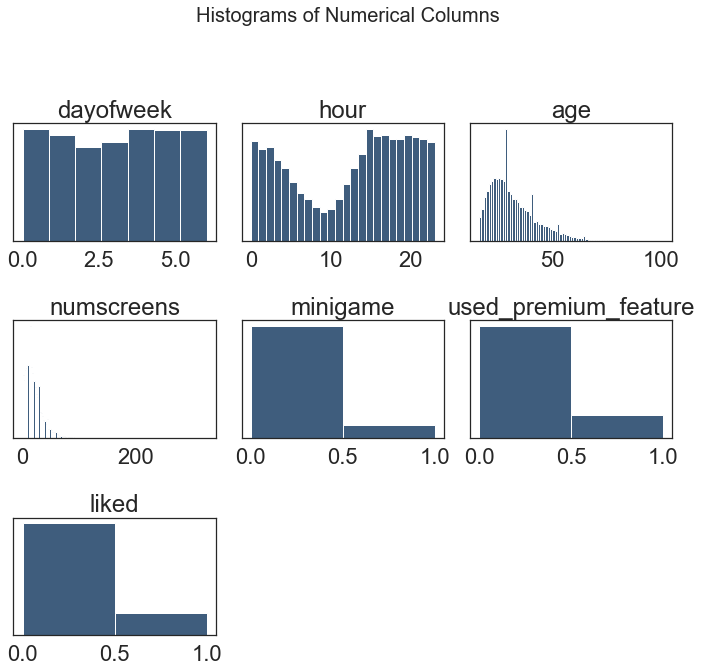

In [132]:
## Histograms
plt.figure(figsize=(10,10))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()  # clean up all fields
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())              # np.size returns the num of elements in array. So returns num of unique values per columns
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D') # hist using the number of unique values as bins

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('app_data_hist.jpg')

<AxesSubplot:title={'center':'Correlation with Response variable'}>

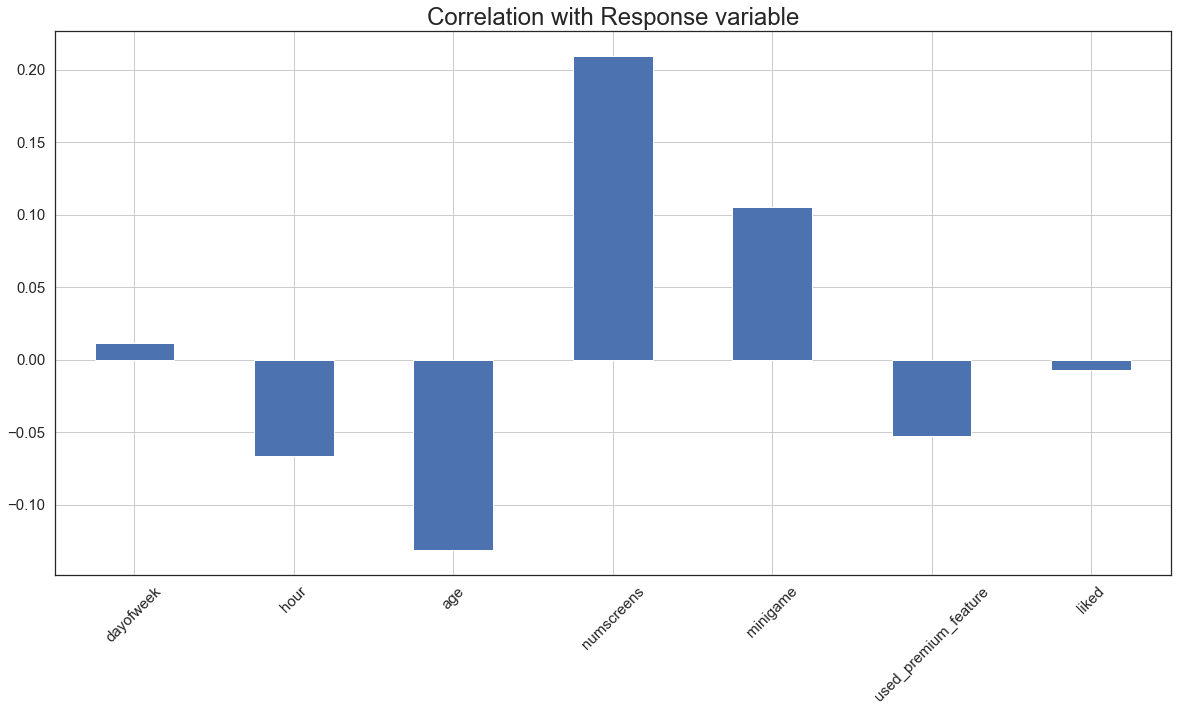

In [133]:
## Correlation between all variables and Response Variable 'enrolled'
# corrwith returns a table with correlations
dataset2.corrwith(dataset['enrolled']).plot.bar(figsize=(20,10),
                  title = 'Correlation with Response variable',
                  fontsize = 15, rot = 45,
                  grid = True)


#### Observation: negative correlation to enrolment: age, hour => the older the less likely you will enroll

In [134]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

corr   # symetric matrix

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


<AxesSubplot:>

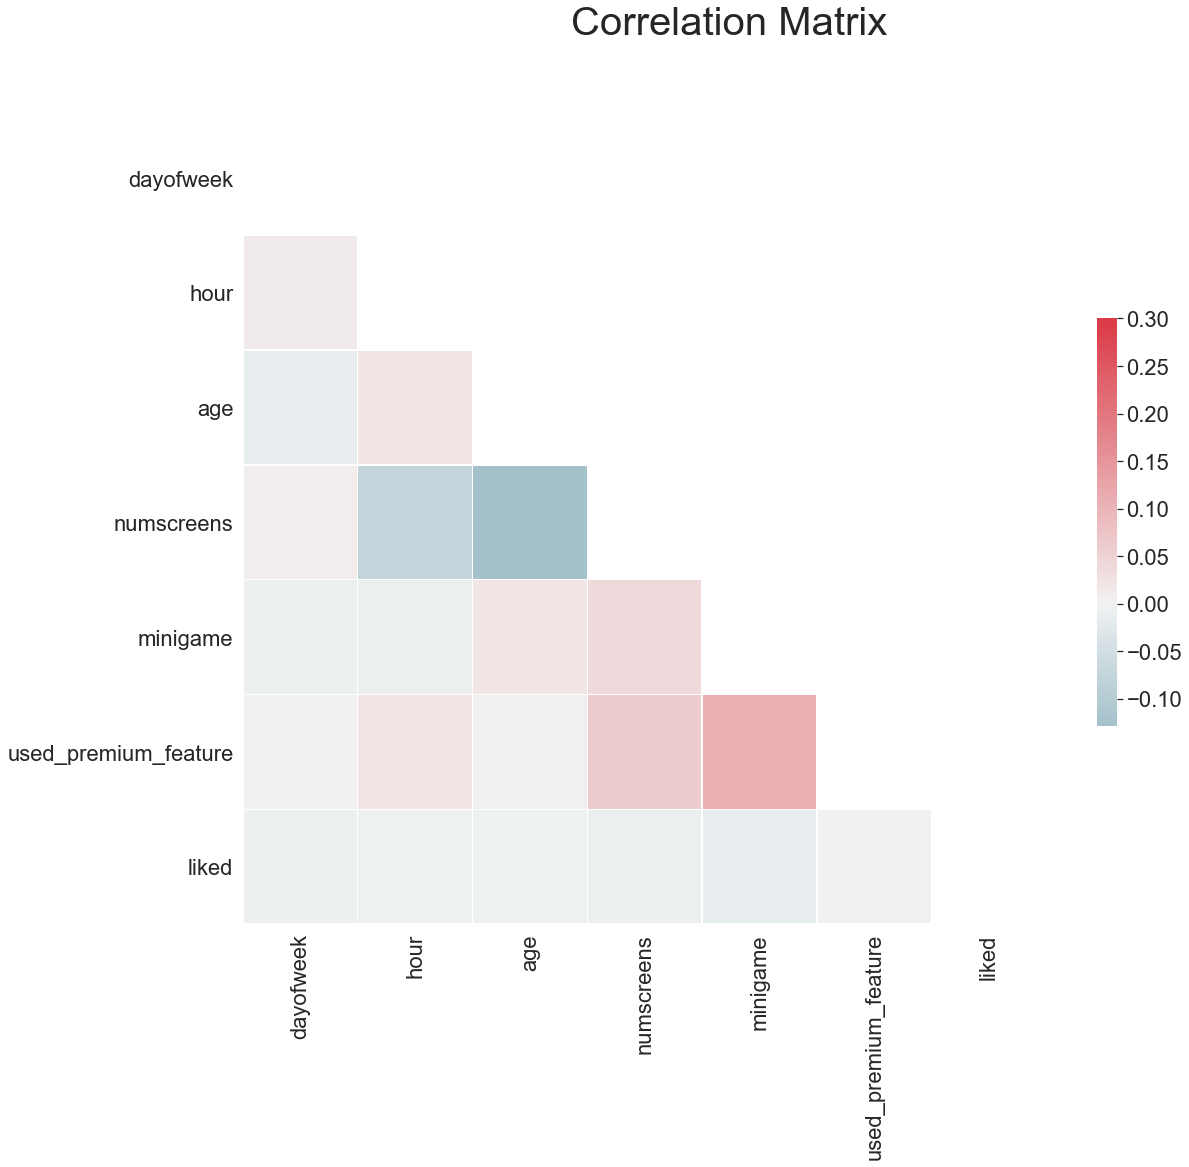

In [135]:
# Generate a mask for the upper triangle  (true or 1 for upper part, 0 or false for lower triangle of array)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True    # numpy.triu_indices_from(arr, k=0) Return the indices for the upper-triangle of arr. k = diagonal offset

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# - square: if True, set the Axes aspect to “equal” so each cell will be square-shaped.
# - mask : data will not be shown in cells where mask is True
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Engineering

In [136]:
# Formatting Date Columns
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [137]:
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [138]:
dataset["first_open"].head()

0   2012-12-27 02:14:51.273
1   2012-12-02 01:16:00.905
2   2013-03-19 19:19:09.157
3   2013-07-05 16:08:46.354
4   2013-02-26 18:50:48.661
Name: first_open, dtype: datetime64[ns]

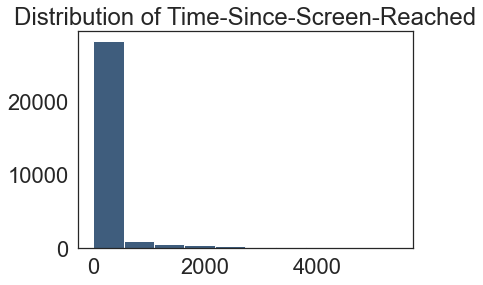

In [139]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [140]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
difference                     float64
dtype: object

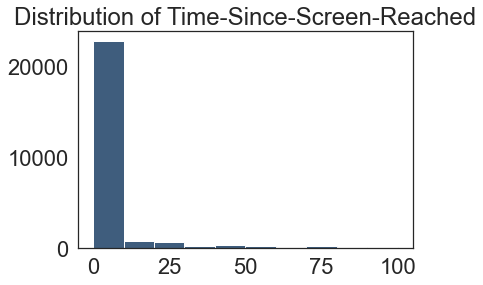

In [141]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [142]:
# use cut-off of 2 days ie 48h. If not enrolled after 2 days then consider will not enroll (0)
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


### Formatting the screen_list Field

In [143]:
# Load Top Screens (popular screens)
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [144]:
# Mapping Screens to Fields
# clean column
dataset["screen_list"] = dataset.screen_list.astype(str) + ','  
dataset["screen_list"].head()

0    idscreen,joinscreen,Cycle,product_review,ScanP...
1    joinscreen,product_review,product_review2,Scan...
2                                   Splash,Cycle,Loan,
3    product_review,Home,product_review,Loan3,Finan...
4    idscreen,joinscreen,Cycle,Credit3Container,Sca...
Name: screen_list, dtype: object

In [145]:
# map new columns to visited screens and clean up 'screen_list' column
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)     # convert boolean return to int
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# map residual secondary screens to 'other' column
dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [147]:
# Group screens with obvious correlations because they are part of identical functional objective
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [148]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [149]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [150]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [151]:
#### Saving Results ####
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [152]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [153]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [156]:
dataset.to_csv('new_appdata10.csv', index = False)

In [155]:
dataset['SavingCount'].unique()  # ==> range of number of screens utilized by user in this funnel

array([ 0,  2,  8,  5,  6,  4,  1,  9,  3, 10,  7], dtype=int64)

# Build the prediction model

In [168]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [165]:
dataset = pd.read_csv('new_appdata10.csv')
response = dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')

In [166]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [167]:
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

In [203]:
print('number of features for prediction model: ', len(X_train.columns))

number of features for prediction model:  48


### Feature Scaling
- we want to normalize all variables so that each has equal importance during training

In [169]:
sc_X = StandardScaler()   # return a array without column names and index

In [172]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))  # dataset already fitted to the scaler

In [175]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index  = X_train.index.values
X_test2.index = X_test.index.values

In [174]:
# Normalized dataset
X_train = X_train2
X_test = X_test2

### Model training

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [181]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')   # L1 regularization or Lasso penalizes screens strongly correlated with response variable
# nb : L2 regularization = Ridge regularization

In [182]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [183]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [190]:
# print statistics
print('accuracy: ', accuracy_score(y_test, y_pred))  # TP + TN / (all positives + all negatives)
print('precision: ', precision_score(y_test, y_pred))   # TP / (TP + FP)
print('recall: ', recall_score(y_test, y_pred))     # TP / (TP + FN)
print('F1_score: ', f1_score(y_test, y_pred))

accuracy:  0.768
precision:  0.7617422721798475
recall:  0.7700892857142857
F1_score:  0.7658930373360243


Test Data accuracy: 0.7680


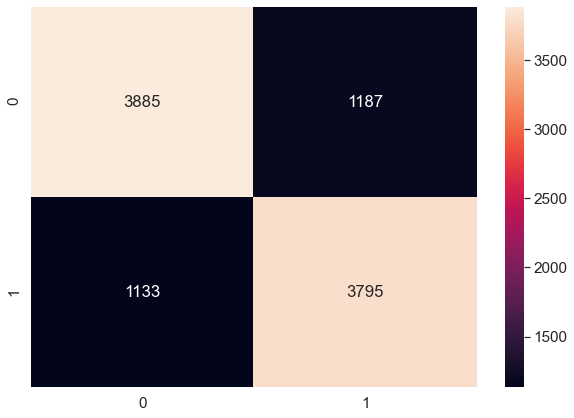

In [192]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print('Test Data accuracy: %0.4f' % accuracy_score(y_test, y_pred))

In [193]:
# Prediction model validation (checking model behaves uniformly)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X= X_train, y= y_train, cv= 10)  # cv= number of folds
print('logistic accuracy: %0.3f (+/- %0.3f)' %(accuracies.mean(), accuracies.std()*2))

logistic accuracy: 0.767 (+/- 0.009)


### Model interpretation

In [245]:
set_of_weights={}
for feature, weight in zip(X_train.columns, classifier.coef_[0]):
    set_of_weights[feature] = weight
print('Top 5 highest contributing features to subscription:')  
[print('weight: %0.3f '%value,'\tfeature: ', key) for (key, value) in sorted(set_of_weights.items(), reverse=True, key=lambda x: x[1])[:5]]
print()
print('Top 5 features adversily contributing the most to subscription:')  
[print('weight: %0.3f '%value,'\tfeature: ', key) for (key, value) in sorted(set_of_weights.items(), reverse=False, key=lambda x: x[1])[:5]]

Top 5 highest contributing features to subscription:
weight: 0.953  	feature:  Other
weight: 0.651  	feature:  VerifyPhone
weight: 0.576  	feature:  CMCount
weight: 0.310  	feature:  VerifyMobile
weight: 0.163  	feature:  idscreen

Top 5 features adversily contributing the most to subscription:
weight: -0.490  	feature:  LoansCount
weight: -0.318  	feature:  VerifyCountry
weight: -0.212  	feature:  Alerts
weight: -0.150  	feature:  age
weight: -0.131  	feature:  numscreens


[None, None, None, None, None]

Remark :
- We could have anticipated the presence of verifyPhone and VerifyMobile as these are likely key steps towards subscription. These variables could therefore be somehow highly correlated with subscription, and they might not be appropriate decision variables.
- On the other hand, one could argue that a user NOT visiting the 'verify...' screens will not subscribe since it is likely compulsory to do so to finalize the process.
- 'Other' appears as the top contributor factor. Within 'other' category, there are critical decision drivers which should be isolated and used back as fully independent variables for the prediction.
- The adverse factors give valuable information. The more loans the user has, the less likely the user will subscribe. UX related to loan pages could be investigated (is it too complicated and worrisome? Is it capturing the right information? ...). Alerts also impact negatively and Alert functionality should be investigated (are the alerts relevant? Are they too frequent / too many of them?...). These information can help to refine the UX of the app and improve functionalities for better service.

### Formatting final results

In [194]:
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


In [195]:
np.sum(final_results['enrolled']!=final_results['predicted_results'])

2320

In [197]:
np.sum(final_results['enrolled']==final_results['predicted_results'])

7680

## Conclusion :
- we can now target our marketing efforts on users unlikely to subscribe (prediction = 0) while running the model for users past the trial period. This avoids spending effort and marketing discounts to users likely to register anyhow and generate an ROI through users turned to subscriptions.
- Additionally, we can validate the model by running predictions on daily new installs and check whether the predictions and accuracy remain consistent.

# Further Analysis

- Remove 'Verify...' columns

In [267]:
X_train_adj = X_train.drop(columns= ['VerifyPhone','VerifyMobile', 'VerifyDateOfBirth', 'VerifyAnnualIncome','VerifyHousing','VerifyHousingAmount','BankVerification'])
X_test_adj = X_test.drop(columns= ['VerifyPhone','VerifyMobile', 'VerifyDateOfBirth', 'VerifyAnnualIncome','VerifyHousing','VerifyHousingAmount','BankVerification'])
print('number of features for prediction model: ', len(X_train_adj.columns))

number of features for prediction model:  41


- Re-fit model and evaluate performance

In [268]:
classifier2 = LogisticRegression(random_state = 0, penalty = 'l2')
classifier2.fit(X_train_adj, y_train)
y_pred2 = classifier2.predict(X_test_adj)

Test Data accuracy: 0.7485


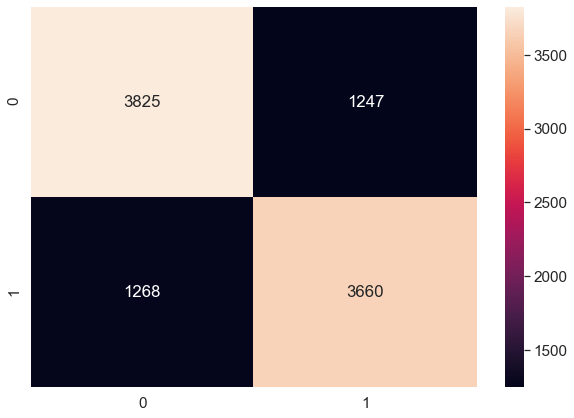

In [269]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred2)
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print('Test Data accuracy: %0.4f' % accuracy_score(y_test, y_pred2))

- Check most critical drivers for subscription

In [270]:
set_of_weights2={}
for feature, weight in zip(X_train_adj.columns, classifier2.coef_[0]):
    set_of_weights2[feature] = weight
print('Top 5 highest contributing features to subscription:')  
[print('weight: %0.3f '%value,'\tfeature: ', key) for (key, value) in sorted(set_of_weights2.items(), reverse=True, key=lambda x: x[1])[:5]]
print()
print('Top 5 features adversily contributing the most to subscription:')  
[print('weight: %0.3f '%value,'\tfeature: ', key) for (key, value) in sorted(set_of_weights2.items(), reverse=False, key=lambda x: x[1])[:5]]

Top 5 highest contributing features to subscription:
weight: 1.064  	feature:  Other
weight: 0.812  	feature:  CMCount
weight: 0.180  	feature:  idscreen
weight: 0.157  	feature:  location
weight: 0.053  	feature:  SavingCount

Top 5 features adversily contributing the most to subscription:
weight: -0.588  	feature:  LoansCount
weight: -0.283  	feature:  Alerts
weight: -0.151  	feature:  age
weight: -0.120  	feature:  Login
weight: -0.114  	feature:  ProfilePage


[None, None, None, None, None]

### Refine model
- Slim down 'other' category

In [438]:
dataset_alt = pd.read_csv('appdata10.csv')
dataset_alt["hour"] = dataset_alt.hour.str.slice(1, 3).astype(int)
dataset_alt["first_open"] = [parser.parse(row_date) for row_date in dataset_alt["first_open"]]
dataset_alt["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset_alt["enrolled_date"]]
dataset_alt["difference"] = (dataset_alt.enrolled_date - dataset_alt.first_open).astype('timedelta64[h]')
dataset_alt.loc[dataset_alt.difference > 48, 'enrolled'] = 0
dataset_alt = dataset_alt.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [439]:
dataset_alt['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                        Splash,Cycle,Loan
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                   Cycle,Splash,Home,RewardsContainer
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [440]:
top_screens2 = pd.read_csv('top_screens.csv').top_screens.values
top_screens2

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [441]:
#top_screens2 = np.delete(top_screens2, [4, 5, 6, 31, 32, 34, 42])
#top_screens2

In [442]:
top_screens2 = np.append(top_screens2, ['joinscreen', 'product_review', 'product_review2', 'product_review3', 'Home', 'ScanPreview', 'ReferralContainer', 'ProfileChildren', 'SelectInstitution','VerifyToken','VerifySSN'])
top_screens2

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'joinscreen', 'product_review', 'product_rev

In [443]:
dataset_alt["screen_list"] = dataset_alt.screen_list.astype(str) + ','  
for sc in top_screens2:
    dataset_alt[sc] = dataset_alt.screen_list.str.contains(sc).astype(int)     # convert boolean return to int
    dataset_alt['screen_list'] = dataset_alt.screen_list.str.replace(sc+",", "")

In [444]:
dataset_alt['screen_list']

0        ProfileSettings,ForgotPassword,
1                                       
2                                       
3                                       
4                                       
                      ...               
49995                                 ML
49996                                   
49997                                   
49998                                   
49999                            Profile
Name: screen_list, Length: 50000, dtype: object

In [445]:
dataset_alt['Other'] = dataset_alt.screen_list.str.count(",")
dataset_alt = dataset_alt.drop(columns=['screen_list'])

In [446]:
dataset_alt["SavingCount"] = dataset_alt[savings_screens].sum(axis=1)
dataset_alt = dataset_alt.drop(columns=savings_screens)

dataset_alt["CMCount"] = dataset_alt[cm_screens].sum(axis=1)
dataset_alt = dataset_alt.drop(columns=cm_screens)

dataset_alt["CCCount"] = dataset_alt[cc_screens].sum(axis=1)
dataset_alt = dataset_alt.drop(columns=cc_screens)

dataset_alt["LoansCount"] = dataset_alt[loan_screens].sum(axis=1)
dataset_alt = dataset_alt.drop(columns=loan_screens)

In [447]:
dataset_alt = dataset_alt.drop(columns= ['VerifyPhone','VerifyMobile', 'VerifyDateOfBirth', 'VerifyAnnualIncome','VerifyHousing','VerifyHousingAmount','BankVerification','VerifyToken','VerifySSN','VerifyToken','VerifySSN', 'VerifyCountry'])

In [448]:
dataset_alt.to_csv('alt_appdata10.csv', index = False)

In [449]:
dataset = pd.read_csv('alt_appdata10.csv')
response = dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index  = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [450]:
#X_train = X_train.drop(columns= ['VerifyPhone','VerifyMobile', 'VerifyDateOfBirth', 'VerifyAnnualIncome','VerifyHousing','VerifyHousingAmount','BankVerification','VerifyToken','VerifySSN'])
#X_test = X_test.drop(columns= ['VerifyPhone','VerifyMobile', 'VerifyDateOfBirth', 'VerifyAnnualIncome','VerifyHousing','VerifyHousingAmount','BankVerification','VerifyToken','VerifySSN'])
print('number of features for prediction model: ', len(X_train.columns))

number of features for prediction model:  49


Test Data accuracy: 0.7360


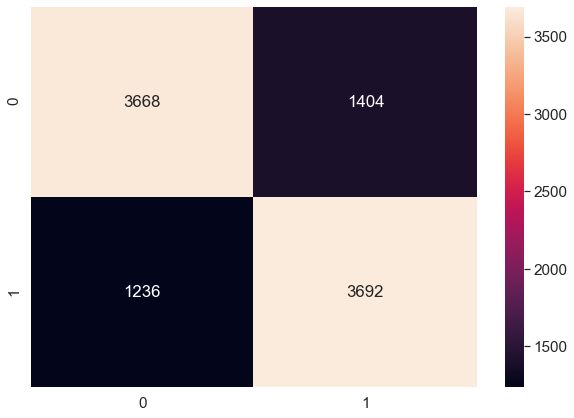

In [451]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print('Test Data accuracy: %0.4f' % accuracy_score(y_test, y_pred))

In [452]:
set_of_weights={}
for feature, weight in zip(X_train.columns, classifier.coef_[0]):
    set_of_weights[feature] = weight
print('Top 5 highest contributing features to subscription:')  
[print('weight: %0.3f '%value,'\tfeature: ', key) for (key, value) in sorted(set_of_weights.items(), reverse=True, key=lambda x: x[1])[:5]]
print()
print('Top 5 features adversily contributing the most to subscription:')  
[print('weight: %0.3f '%value,'\tfeature: ', key) for (key, value) in sorted(set_of_weights.items(), reverse=False, key=lambda x: x[1])[:5]]

Top 5 highest contributing features to subscription:
weight: 0.678  	feature:  CMCount
weight: 0.410  	feature:  ScanPreview
weight: 0.373  	feature:  numscreens
weight: 0.318  	feature:  SelectInstitution
weight: 0.224  	feature:  product_review3

Top 5 features adversily contributing the most to subscription:
weight: -0.309  	feature:  LoansCount
weight: -0.262  	feature:  Alerts
weight: -0.228  	feature:  Other
weight: -0.182  	feature:  Institutions
weight: -0.136  	feature:  age


[None, None, None, None, None]

### Conclusion Alternative approach:
- if we assume the screens associated to 'Verify' opperations are highly correlated with subscription, removing these columns from our model allows to emphazise other key decision drivers suach as those shown above
    - deterioration on accurracy is observed but remains limited (77% to 74%)
- On the other side, variables with negative impact of the subscription conversion remain unchanged by large: LoansCount, Alerts, Age
The correct assumptions on how to consider 'Verify..' screens should be reviewed with the business